In [ ]:
# Netflix Content Supply Gap Analysis

## Business Problem
Netflix wants to expand content in underrepresented regions.
The goal is to identify:
1. Countries with low content availability
2. Genres that are globally popular but missing in these regions

## Objective
Use content availability as a proxy for demand and recommend
which genres Netflix should invest in for growth.

Saving netflix_titles.csv to netflix_titles.csv


{'netflix_titles.csv': b'show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description\ns1,Movie,Dick Johnson Is Dead,Kirsten Johnson,,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmmaker Kirsten Johnson stages his death in inventive and comical ways to help them both face the inevitable."\ns2,TV Show,Blood & Water,,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thabang Molaba, Dillon Windvogel, Natasha Thahane, Arno Greeff, Xolile Tshabalala, Getmore Sithole, Cindy Mahlangu, Ryle De Morny, Greteli Fincham, Sello Maake Ka-Ncube, Odwa Gwanya, Mekaila Mathys, Sandi Schultz, Duane Williams, Shamilla Miller, Patrick Mofokeng",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town teen sets out to prove whether a private-school swimming star is her sister who was abducted at birth."\ns3,TV Show,Ga

In [2]:
from google.colab import files
files.upload()

Saving netflix_titles.csv to netflix_titles.csv


{'netflix_titles.csv': b'show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description\ns1,Movie,Dick Johnson Is Dead,Kirsten Johnson,,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmmaker Kirsten Johnson stages his death in inventive and comical ways to help them both face the inevitable."\ns2,TV Show,Blood & Water,,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thabang Molaba, Dillon Windvogel, Natasha Thahane, Arno Greeff, Xolile Tshabalala, Getmore Sithole, Cindy Mahlangu, Ryle De Morny, Greteli Fincham, Sello Maake Ka-Ncube, Odwa Gwanya, Mekaila Mathys, Sandi Schultz, Duane Williams, Shamilla Miller, Patrick Mofokeng",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town teen sets out to prove whether a private-school swimming star is her sister who was abducted at birth."\ns3,TV Show,Ga

In [3]:
import pandas as pd
df=pd.read_csv('netflix_titles.csv')

In [4]:
df.head()

show_id     type                  title         director  \
0      s1    Movie   Dick Johnson Is Dead  Kirsten Johnson   
1      s2  TV Show          Blood & Water              NaN   
2      s3  TV Show              Ganglands  Julien Leclercq   
3      s4  TV Show  Jailbirds New Orleans              NaN   
4      s5  TV Show           Kota Factory              NaN   

                                                cast        country  \
0                                                NaN  United States   
1  Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...   South Africa   
2  Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...            NaN   
3                                                NaN            NaN   
4  Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...          India   

           date_added  release_year rating   duration  \
0  September 25, 2021          2020  PG-13     90 min   
1  September 24, 2021          2021  TV-MA  2 Seasons   
2  September 24, 2021          2021  TV-MA   1 Season   
3  September 24, 2021          2021  TV-MA   1 Season   
4  September 24, 2021          2021  TV-MA  2 Seasons   

                                           listed_in  \
0                                      Documentaries   
1    International TV Shows, TV Dramas, TV Mysteries   
2  Crime TV Shows, International TV Shows, TV Act...   
3                             Docuseries, Reality TV   
4  International TV Shows, Romantic TV Shows, TV ...   

                                         description  
0  As her father nears the end of his life, filmm...  
1  After crossing paths at a party, a Cape Town t...  
2  To protect his family from a powerful drug lor...  
3  Feuds, flirtations and toilet talk go down amo...  
4  In a city of coaching centers known to train I...

In [5]:
df.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [ ]:
## Data Preparation – Column Selection

Columns like cast, director, description, and duration
are removed because they are not required for analyzing
content availability by country and genre.


In [6]:
df.drop(['show_id','director','cast','duration','description'],axis=1,inplace=True)

In [7]:
df.shape

(8807, 7)

In [8]:
df.isna().sum()

type              0
title             0
country         831
date_added       10
release_year      0
rating            4
listed_in         0
dtype: int64

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   type          8807 non-null   object
 1   title         8807 non-null   object
 2   country       7976 non-null   object
 3   date_added    8797 non-null   object
 4   release_year  8807 non-null   int64 
 5   rating        8803 non-null   object
 6   listed_in     8807 non-null   object
dtypes: int64(1), object(6)
memory usage: 481.8+ KB


In [ ]:
## Handling Missing Values

Missing values in country, rating, and date_added
are filled with 'Unknown' to retain records
without introducing bias.


In [10]:
text_cols=['country','date_added','rating']
for col in text_cols:
  df[col]=df[col].fillna('Unknown')

In [11]:
df.isna().sum()

type            0
title           0
country         0
date_added      0
release_year    0
rating          0
listed_in       0
dtype: int64

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   type          8807 non-null   object
 1   title         8807 non-null   object
 2   country       8807 non-null   object
 3   date_added    8807 non-null   object
 4   release_year  8807 non-null   int64 
 5   rating        8807 non-null   object
 6   listed_in     8807 non-null   object
dtypes: int64(1), object(6)
memory usage: 481.8+ KB


In [13]:
df.drop_duplicates(subset=['title','country'])

type                  title        country          date_added  \
0       Movie   Dick Johnson Is Dead  United States  September 25, 2021   
1     TV Show          Blood & Water   South Africa  September 24, 2021   
2     TV Show              Ganglands        Unknown  September 24, 2021   
3     TV Show  Jailbirds New Orleans        Unknown  September 24, 2021   
4     TV Show           Kota Factory          India  September 24, 2021   
...       ...                    ...            ...                 ...   
8802    Movie                 Zodiac  United States   November 20, 2019   
8803  TV Show            Zombie Dumb        Unknown        July 1, 2019   
8804    Movie             Zombieland  United States    November 1, 2019   
8805    Movie                   Zoom  United States    January 11, 2020   
8806    Movie                 Zubaan          India       March 2, 2019   

      release_year rating                                          listed_in  
0             2020  PG-13                                      Documentaries  
1             2021  TV-MA    International TV Shows, TV Dramas, TV Mysteries  
2             2021  TV-MA  Crime TV Shows, International TV Shows, TV Act...  
3             2021  TV-MA                             Docuseries, Reality TV  
4             2021  TV-MA  International TV Shows, Romantic TV Shows, TV ...  
...            ...    ...                                                ...  
8802          2007      R                     Cult Movies, Dramas, Thrillers  
8803          2018  TV-Y7             Kids' TV, Korean TV Shows, TV Comedies  
8804          2009      R                            Comedies, Horror Movies  
8805          2006     PG                 Children & Family Movies, Comedies  
8806          2015  TV-14     Dramas, International Movies, Music & Musicals  

[8807 rows x 7 columns]

In [ ]:
## Normalizing Country and Genre Columns

Some titles belong to multiple countries and genres.
We split and explode these columns so that each
country–genre combination can be analyzed independently.


In [14]:
df['listed_in']=df['listed_in'].str.split(',')

In [15]:
df=df.explode('listed_in')

In [16]:
df['listed_in']=df['listed_in'].str.strip()

In [17]:
df.rename(columns={'listed_in':'genre'},inplace=True)

In [18]:
df.head()

type                 title        country          date_added  \
0    Movie  Dick Johnson Is Dead  United States  September 25, 2021   
1  TV Show         Blood & Water   South Africa  September 24, 2021   
1  TV Show         Blood & Water   South Africa  September 24, 2021   
1  TV Show         Blood & Water   South Africa  September 24, 2021   
2  TV Show             Ganglands        Unknown  September 24, 2021   

   release_year rating                   genre  
0          2020  PG-13           Documentaries  
1          2021  TV-MA  International TV Shows  
1          2021  TV-MA               TV Dramas  
1          2021  TV-MA            TV Mysteries  
2          2021  TV-MA          Crime TV Shows

In [19]:
df['genre'].value_counts(10)

genre
International Movies            0.142421
Dramas                          0.125602
Comedies                        0.086633
International TV Shows          0.069917
Documentaries                   0.044972
Action & Adventure              0.044455
TV Dramas                       0.039487
Independent Movies              0.039124
Children & Family Movies        0.033173
Romantic Movies                 0.031879
TV Comedies                     0.030068
Thrillers                       0.029861
Crime TV Shows                  0.024323
Kids' TV                        0.023340
Docuseries                      0.020442
Music & Musicals                0.019407
Romantic TV Shows               0.019148
Horror Movies                   0.018475
Stand-Up Comedy                 0.017751
Reality TV                      0.013197
British TV Shows                0.013093
Sci-Fi & Fantasy                0.012576
Sports Movies                   0.011334
Anime Series                    0.009108
Spanish-Language TV Shows       0.009005
TV Action & Adventure           0.008694
Korean TV Shows                 0.007815
Classic Movies                  0.006003
LGBTQ Movies                    0.005279
TV Mysteries                    0.005072
Science & Nature TV             0.004761
TV Sci-Fi & Fantasy             0.004347
TV Horror                       0.003881
Cult Movies                     0.003674
Anime Features                  0.003674
Teen TV Shows                   0.003571
Faith & Spirituality            0.003364
TV Thrillers                    0.002950
Movies                          0.002950
Stand-Up Comedy & Talk Shows    0.002898
Classic & Cult TV               0.001449
TV Shows                        0.000828
Name: proportion, dtype: float64

In [20]:
df['country']=df['country'].str.split(',')

In [21]:
df=df.explode('country')

In [22]:
df['country']=df['country'].str.strip()

In [ ]:
## Identifying Underrepresented Countries

We count unique titles per country.
The bottom 20% of countries by title count
are defined as underrepresented markets.


In [23]:
country_count=df.groupby('country')['title'].nunique().sort_values()

In [24]:
cutoff=int(len(country_count)*0.2)
underrepresented_countries=country_count.iloc[:cutoff]
underrepresented_countries

country
Afghanistan           1
Albania               1
Armenia               1
Angola                1
Belarus               1
Bermuda               1
Bahamas               1
Azerbaijan            1
Botswana              1
Cyprus                1
Cameroon              1
Dominican Republic    1
Cuba                  1
Burkina Faso          1
Ecuador               1
East Germany          1
Jamaica               1
Lithuania             1
Latvia                1
Kazakhstan            1
Liechtenstein         1
Ethiopia              1
Samoa                 1
Puerto Rico           1
Name: title, dtype: int64

In [25]:
countries=underrepresented_countries.index
countries

Index(['Afghanistan', 'Albania', 'Armenia', 'Angola', 'Belarus', 'Bermuda',
       'Bahamas', 'Azerbaijan', 'Botswana', 'Cyprus', 'Cameroon',
       'Dominican Republic', 'Cuba', 'Burkina Faso', 'Ecuador', 'East Germany',
       'Jamaica', 'Lithuania', 'Latvia', 'Kazakhstan', 'Liechtenstein',
       'Ethiopia', 'Samoa', 'Puerto Rico'],
      dtype='object', name='country')

In [26]:
df_under=df[df['country'].isin(countries)]
df_under

type                                title             country  \
7       Movie                              Sankofa        Burkina Faso   
7       Movie                              Sankofa            Ethiopia   
7       Movie                              Sankofa        Burkina Faso   
7       Movie                              Sankofa            Ethiopia   
7       Movie                              Sankofa        Burkina Faso   
7       Movie                              Sankofa            Ethiopia   
1099    Movie                The Fisherman's Diary            Cameroon   
1099    Movie                The Fisherman's Diary            Cameroon   
2087    Movie                              Santana              Angola   
2087    Movie                              Santana              Angola   
2238  TV Show                        Sunny Bunnies             Belarus   
2238  TV Show                        Sunny Bunnies             Belarus   
2238  TV Show                        Sunny Bunnies             Belarus   
2660  TV Show                Nicky Jam: El Ganador         Puerto Rico   
2660  TV Show                Nicky Jam: El Ganador         Puerto Rico   
2660  TV Show                Nicky Jam: El Ganador         Puerto Rico   
2910  TV Show              Talking Tom and Friends              Cyprus   
2910  TV Show              Talking Tom and Friends              Cyprus   
4878    Movie                 Forgive Us Our Debts             Albania   
4878    Movie                 Forgive Us Our Debts             Albania   
5930    Movie                         Mission Blue             Bermuda   
5930    Movie                         Mission Blue             Ecuador   
6233    Movie                             Barbecue             Armenia   
6233    Movie                             Barbecue             Armenia   
6427    Movie                        Casino Royale             Bahamas   
6599    Movie                        Devil's Bride              Latvia   
6599    Movie                        Devil's Bride              Latvia   
6619    Movie                       Doctor Zhivago       Liechtenstein   
6619    Movie                       Doctor Zhivago       Liechtenstein   
6619    Movie                       Doctor Zhivago       Liechtenstein   
6791  TV Show               Four Seasons in Havana                Cuba   
6791  TV Show               Four Seasons in Havana                Cuba   
6791  TV Show               Four Seasons in Havana                Cuba   
7061    Movie                          In The Deep  Dominican Republic   
7061    Movie                          In The Deep  Dominican Republic   
7061    Movie                          In The Deep  Dominican Republic   
7341    Movie                Losing Sight of Shore               Samoa   
7341    Movie                Losing Sight of Shore               Samoa   
7385  TV Show                      Mahmut & Meryem          Azerbaijan   
7385  TV Show                      Mahmut & Meryem          Azerbaijan   
7385  TV Show                      Mahmut & Meryem          Azerbaijan   
7556    Movie       Naledi: A Baby Elephant's Tale            Botswana   
8073    Movie                             Sprinter             Jamaica   
8073    Movie                             Sprinter             Jamaica   
8073    Movie                             Sprinter             Jamaica   
8162    Movie                        Tellur Aliens          Kazakhstan   
8286    Movie                    The Eichmann Show           Lithuania   
8286    Movie                    The Eichmann Show           Lithuania   
8382    Movie          The Land of the Enlightened         Afghanistan   
8382    Movie          The Land of the Enlightened         Afghanistan   
8745    Movie  Willy Wonka & the Chocolate Factory        East Germany   
8745    Movie  Willy Wonka & the Chocolate Factory        East Germany   
8745    Movie  Willy Wonka & the Chocolate Factory        East Germany   

            

In [27]:
global_dist=df['genre'].value_counts(normalize=True)
global_dist

genre
International Movies            0.147829
Dramas                          0.134742
Comedies                        0.083361
International TV Shows          0.061648
Action & Adventure              0.049739
Documentaries                   0.047046
Independent Movies              0.043764
TV Dramas                       0.035853
Children & Family Movies        0.035558
Thrillers                       0.033917
Romantic Movies                 0.030382
TV Comedies                     0.026511
Kids' TV                        0.025080
Crime TV Shows                  0.022766
Horror Movies                   0.019273
Docuseries                      0.018347
Music & Musicals                0.018053
Romantic TV Shows               0.016159
Sci-Fi & Fantasy                0.015991
Stand-Up Comedy                 0.014476
British TV Shows                0.012877
Reality TV                      0.011362
Sports Movies                   0.011151
TV Action & Adventure           0.008584
Spanish-Language TV Shows       0.008500
Anime Series                    0.008079
Korean TV Shows                 0.006565
Classic Movies                  0.006396
LGBTQ Movies                    0.004881
TV Mysteries                    0.004755
Science & Nature TV             0.004545
TV Sci-Fi & Fantasy             0.004250
Cult Movies                     0.003913
Faith & Spirituality            0.003745
TV Horror                       0.003619
Anime Features                  0.003282
Movies                          0.002946
Teen TV Shows                   0.002904
TV Thrillers                    0.002777
Stand-Up Comedy & Talk Shows    0.002357
Classic & Cult TV               0.001347
TV Shows                        0.000673
Name: proportion, dtype: float64

In [28]:
under_dist=df_under['genre'].value_counts(normalize=True)
under_dist

genre
International Movies         0.207547
Dramas                       0.150943
Documentaries                0.113208
International TV Shows       0.056604
Action & Adventure           0.037736
Independent Movies           0.037736
Kids' TV                     0.037736
TV Comedies                  0.037736
Spanish-Language TV Shows    0.037736
Crime TV Shows               0.037736
Classic Movies               0.037736
Sports Movies                0.037736
Children & Family Movies     0.037736
British TV Shows             0.018868
Horror Movies                0.018868
Romantic Movies              0.018868
Thrillers                    0.018868
Romantic TV Shows            0.018868
TV Dramas                    0.018868
Comedies                     0.018868
Name: proportion, dtype: float64

In [ ]:
## Genre Distribution Comparison

We compare the percentage distribution of genres
globally and within underrepresented countries
to identify content gaps.


In [29]:
genre_compare=pd.DataFrame({
    'Global':global_dist,
    'Underrepresented':under_dist
})
genre_compare

Global  Underrepresented
genre                                                   
Action & Adventure            0.049739          0.037736
Anime Features                0.003282               NaN
Anime Series                  0.008079               NaN
British TV Shows              0.012877          0.018868
Children & Family Movies      0.035558          0.037736
Classic & Cult TV             0.001347               NaN
Classic Movies                0.006396          0.037736
Comedies                      0.083361          0.018868
Crime TV Shows                0.022766          0.037736
Cult Movies                   0.003913               NaN
Documentaries                 0.047046          0.113208
Docuseries                    0.018347               NaN
Dramas                        0.134742          0.150943
Faith & Spirituality          0.003745               NaN
Horror Movies                 0.019273          0.018868
Independent Movies            0.043764          0.037736
International Movies          0.147829          0.207547
International TV Shows        0.061648          0.056604
Kids' TV                      0.025080          0.037736
Korean TV Shows               0.006565               NaN
LGBTQ Movies                  0.004881               NaN
Movies                        0.002946               NaN
Music & Musicals              0.018053               NaN
Reality TV                    0.011362               NaN
Romantic Movies               0.030382          0.018868
Romantic TV Shows             0.016159          0.018868
Sci-Fi & Fantasy              0.015991               NaN
Science & Nature TV           0.004545               NaN
Spanish-Language TV Shows     0.008500          0.037736
Sports Movies                 0.011151          0.037736
Stand-Up Comedy               0.014476               NaN
Stand-Up Comedy & Talk Shows  0.002357               NaN
TV Action & Adventure         0.008584               NaN
TV Comedies                   0.026511          0.037736
TV Dramas                     0.035853          0.018868
TV Horror                     0.003619               NaN
TV Mysteries                  0.004755               NaN
TV Sci-Fi & Fantasy           0.004250               NaN
TV Shows                      0.000673               NaN
TV Thrillers                  0.002777               NaN
Teen TV Shows                 0.002904               NaN
Thrillers                     0.033917          0.018868

In [ ]:
### Key Observations
- Some globally popular genres are missing locally
- Documentaries are overrepresented in small markets
- Certain genres show strong investment opportunities


In [30]:
genre_compare=genre_compare.fillna(0)
genre_compare

Global  Underrepresented
genre                                                   
Action & Adventure            0.049739          0.037736
Anime Features                0.003282          0.000000
Anime Series                  0.008079          0.000000
British TV Shows              0.012877          0.018868
Children & Family Movies      0.035558          0.037736
Classic & Cult TV             0.001347          0.000000
Classic Movies                0.006396          0.037736
Comedies                      0.083361          0.018868
Crime TV Shows                0.022766          0.037736
Cult Movies                   0.003913          0.000000
Documentaries                 0.047046          0.113208
Docuseries                    0.018347          0.000000
Dramas                        0.134742          0.150943
Faith & Spirituality          0.003745          0.000000
Horror Movies                 0.019273          0.018868
Independent Movies            0.043764          0.037736
International Movies          0.147829          0.207547
International TV Shows        0.061648          0.056604
Kids' TV                      0.025080          0.037736
Korean TV Shows               0.006565          0.000000
LGBTQ Movies                  0.004881          0.000000
Movies                        0.002946          0.000000
Music & Musicals              0.018053          0.000000
Reality TV                    0.011362          0.000000
Romantic Movies               0.030382          0.018868
Romantic TV Shows             0.016159          0.018868
Sci-Fi & Fantasy              0.015991          0.000000
Science & Nature TV           0.004545          0.000000
Spanish-Language TV Shows     0.008500          0.037736
Sports Movies                 0.011151          0.037736
Stand-Up Comedy               0.014476          0.000000
Stand-Up Comedy & Talk Shows  0.002357          0.000000
TV Action & Adventure         0.008584          0.000000
TV Comedies                   0.026511          0.037736
TV Dramas                     0.035853          0.018868
TV Horror                     0.003619          0.000000
TV Mysteries                  0.004755          0.000000
TV Sci-Fi & Fantasy           0.004250          0.000000
TV Shows                      0.000673          0.000000
TV Thrillers                  0.002777          0.000000
Teen TV Shows                 0.002904          0.000000
Thrillers                     0.033917          0.018868

In [31]:
genre_compare['Gap']=genre_compare['Global']-genre_compare['Underrepresented']
genre_compare

Global  Underrepresented       Gap
genre                                                             
Action & Adventure            0.049739          0.037736  0.012003
Anime Features                0.003282          0.000000  0.003282
Anime Series                  0.008079          0.000000  0.008079
British TV Shows              0.012877          0.018868 -0.005991
Children & Family Movies      0.035558          0.037736 -0.002178
Classic & Cult TV             0.001347          0.000000  0.001347
Classic Movies                0.006396          0.037736 -0.031340
Comedies                      0.083361          0.018868  0.064493
Crime TV Shows                0.022766          0.037736 -0.014970
Cult Movies                   0.003913          0.000000  0.003913
Documentaries                 0.047046          0.113208 -0.066162
Docuseries                    0.018347          0.000000  0.018347
Dramas                        0.134742          0.150943 -0.016202
Faith & Spirituality          0.003745          0.000000  0.003745
Horror Movies                 0.019273          0.018868  0.000405
Independent Movies            0.043764          0.037736  0.006028
International Movies          0.147829          0.207547 -0.059719
International TV Shows        0.061648          0.056604  0.005044
Kids' TV                      0.025080          0.037736 -0.012656
Korean TV Shows               0.006565          0.000000  0.006565
LGBTQ Movies                  0.004881          0.000000  0.004881
Movies                        0.002946          0.000000  0.002946
Music & Musicals              0.018053          0.000000  0.018053
Reality TV                    0.011362          0.000000  0.011362
Romantic Movies               0.030382          0.018868  0.011514
Romantic TV Shows             0.016159          0.018868 -0.002709
Sci-Fi & Fantasy              0.015991          0.000000  0.015991
Science & Nature TV           0.004545          0.000000  0.004545
Spanish-Language TV Shows     0.008500          0.037736 -0.029236
Sports Movies                 0.011151          0.037736 -0.026585
Stand-Up Comedy               0.014476          0.000000  0.014476
Stand-Up Comedy & Talk Shows  0.002357          0.000000  0.002357
TV Action & Adventure         0.008584          0.000000  0.008584
TV Comedies                   0.026511          0.037736 -0.011225
TV Dramas                     0.035853          0.018868  0.016985
TV Horror                     0.003619          0.000000  0.003619
TV Mysteries                  0.004755          0.000000  0.004755
TV Sci-Fi & Fantasy           0.004250          0.000000  0.004250
TV Shows                      0.000673          0.000000  0.000673
TV Thrillers                  0.002777          0.000000  0.002777
Teen TV Shows                 0.002904          0.000000  0.002904
Thrillers                     0.033917          0.018868  0.015049

In [32]:
sorted_genre_compare=genre_compare.sort_values('Gap',ascending=False)
sorted_genre_compare

Global  Underrepresented       Gap
genre                                                             
Comedies                      0.083361          0.018868  0.064493
Docuseries                    0.018347          0.000000  0.018347
Music & Musicals              0.018053          0.000000  0.018053
TV Dramas                     0.035853          0.018868  0.016985
Sci-Fi & Fantasy              0.015991          0.000000  0.015991
Thrillers                     0.033917          0.018868  0.015049
Stand-Up Comedy               0.014476          0.000000  0.014476
Action & Adventure            0.049739          0.037736  0.012003
Romantic Movies               0.030382          0.018868  0.011514
Reality TV                    0.011362          0.000000  0.011362
TV Action & Adventure         0.008584          0.000000  0.008584
Anime Series                  0.008079          0.000000  0.008079
Korean TV Shows               0.006565          0.000000  0.006565
Independent Movies            0.043764          0.037736  0.006028
International TV Shows        0.061648          0.056604  0.005044
LGBTQ Movies                  0.004881          0.000000  0.004881
TV Mysteries                  0.004755          0.000000  0.004755
Science & Nature TV           0.004545          0.000000  0.004545
TV Sci-Fi & Fantasy           0.004250          0.000000  0.004250
Cult Movies                   0.003913          0.000000  0.003913
Faith & Spirituality          0.003745          0.000000  0.003745
TV Horror                     0.003619          0.000000  0.003619
Anime Features                0.003282          0.000000  0.003282
Movies                        0.002946          0.000000  0.002946
Teen TV Shows                 0.002904          0.000000  0.002904
TV Thrillers                  0.002777          0.000000  0.002777
Stand-Up Comedy & Talk Shows  0.002357          0.000000  0.002357
Classic & Cult TV             0.001347          0.000000  0.001347
TV Shows                      0.000673          0.000000  0.000673
Horror Movies                 0.019273          0.018868  0.000405
Children & Family Movies      0.035558          0.037736 -0.002178
Romantic TV Shows             0.016159          0.018868 -0.002709
British TV Shows              0.012877          0.018868 -0.005991
TV Comedies                   0.026511          0.037736 -0.011225
Kids' TV                      0.025080          0.037736 -0.012656
Crime TV Shows                0.022766          0.037736 -0.014970
Dramas                        0.134742          0.150943 -0.016202
Sports Movies                 0.011151          0.037736 -0.026585
Spanish-Language TV Shows     0.008500          0.037736 -0.029236
Classic Movies                0.006396          0.037736 -0.031340
International Movies          0.147829          0.207547 -0.059719
Documentaries                 0.047046          0.113208 -0.066162

In [33]:
top_10=sorted_genre_compare.head(10)
top_10

Global  Underrepresented       Gap
genre                                                   
Comedies            0.083361          0.018868  0.064493
Docuseries          0.018347          0.000000  0.018347
Music & Musicals    0.018053          0.000000  0.018053
TV Dramas           0.035853          0.018868  0.016985
Sci-Fi & Fantasy    0.015991          0.000000  0.015991
Thrillers           0.033917          0.018868  0.015049
Stand-Up Comedy     0.014476          0.000000  0.014476
Action & Adventure  0.049739          0.037736  0.012003
Romantic Movies     0.030382          0.018868  0.011514
Reality TV          0.011362          0.000000  0.011362

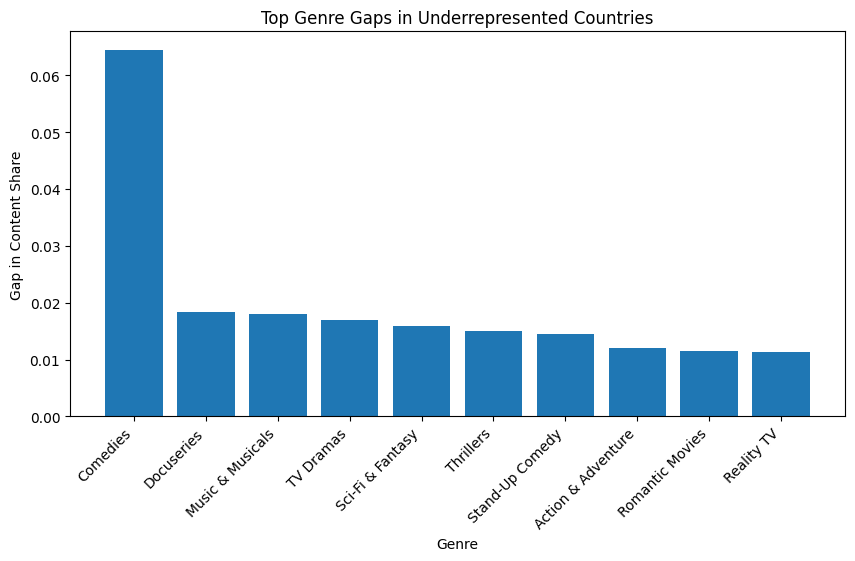

In [34]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,5))
plt.bar(top_10.index, top_10['Gap'])

plt.xticks(rotation=45, ha='right')
plt.xlabel('Genre')
plt.ylabel('Gap in Content Share')
plt.title('Top Genre Gaps in Underrepresented Countries')

plt.show()


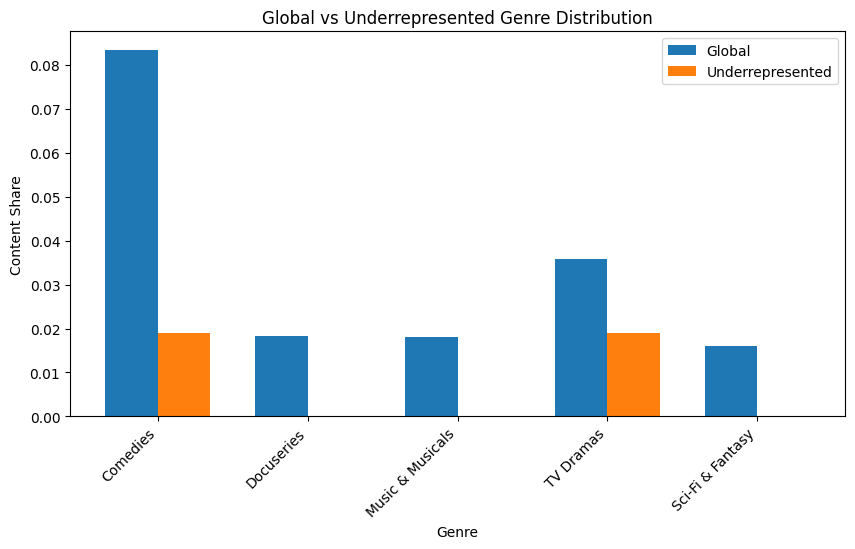

In [35]:
import numpy as np

top5 = top_10.head(5)

x = np.arange(len(top5))
width = 0.35

plt.figure(figsize=(10,5))

plt.bar(x - width/2, top5['Global'], width, label='Global')
plt.bar(x + width/2, top5['Underrepresented'], width, label='Underrepresented')

plt.xticks(x, top5.index, rotation=45, ha='right')
plt.xlabel('Genre')
plt.ylabel('Content Share')
plt.title('Global vs Underrepresented Genre Distribution')
plt.legend()

plt.show()


In [ ]:
## Business Insights & Recommendations

1. Comedy and TV Dramas have strong global demand but are
   significantly underrepresented in smaller markets,
   indicating unmet viewer interest.

2. Multiple globally established genres are completely absent
   in underrepresented regions, highlighting clear content gaps.

3. Local catalogs are heavily skewed toward a limited set of
   genres, reducing overall content diversity.

### Recommendations

- Prioritize acquisition and production of high-gap genres
  such as Comedy and TV Dramas in underrepresented regions.
- Use global performance trends to guide localized content
  investment strategies.
- Gradually diversify regional catalogs to improve user
  retention and engagement.
